In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Ionosphere\Ionosphere_AW_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,NaN,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,NaN,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0,1.00000,-0.02401,NaN,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,NaN,-0.59573,NaN,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,NaN,0.01606,...,0.94520,0.01361,0.93522,0.04925,NaN,0.08168,0.94066,-0.00035,NaN,0.04712
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
int64		column 2	0
float64		column 3	0
float64		column 4	0
float64		column 5	18
float64		column 6	0
float64		column 7	18
float64		column 8	0
float64		column 9	37
float64		column 10	0
float64		column 11	55
float64		column 12	0
float64		column 13	73
float64		column 14	0
float64		column 15	54
float64		column 16	0
float64		column 17	55
float64		column 18	0
float64		column 19	55
float64		column 20	0
float64		column 21	55
float64		column 22	0
float64		column 23	37
float64		column 24	0
float64		column 25	0
float64		column 26	0
float64		column 27	0
float64		column 28	0
float64		column 29	37
float64		column 30	0
float64		column 31	36
float64		column 32	0
float64		column 33	36
float64		column 34	18


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,351.000000,351.0,351.000000,351.000000,333.000000,351.000000,333.000000,351.000000,314.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,314.000000,351.000000,315.000000,351.000000,315.000000,333.000000
mean,0.891738,0.0,0.641342,0.044372,0.608142,0.115889,0.563157,0.119360,0.503000,0.181345,...,0.396135,-0.071187,0.541641,-0.069538,0.376707,-0.027907,0.379604,-0.003794,0.346907,0.000208
std,0.311155,0.0,0.497708,0.441435,0.508948,0.460810,0.482632,0.520750,0.501295,0.483851,...,0.578451,0.508495,0.516205,0.550025,0.574229,0.507974,0.553179,0.513574,0.518732,0.451844
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.423280,-0.024795,0.250000,-0.054840,0.093298,-0.048075,...,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.168270
50%,1.000000,0.0,0.871110,0.016310,0.808040,0.022800,0.753760,0.014710,0.662970,0.018290,...,0.553890,-0.015050,0.708240,-0.017690,0.496010,0.000000,0.466670,0.000000,0.408210,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.978110,0.445675,0.931050,0.534195,...,0.905240,0.156765,0.999945,0.153535,0.876750,0.154075,0.869935,0.200120,0.795885,0.151140
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

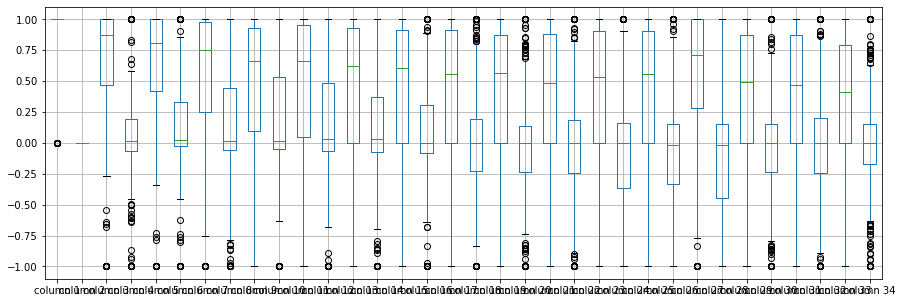

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     0.891738
column 2     0.000000
column 3     0.641342
column 4     0.044372
column 5     0.608142
column 6     0.115889
column 7     0.563157
column 8     0.119360
column 9     0.503000
column 10    0.181345
column 11    0.480635
column 12    0.155040
column 13    0.385400
column 14    0.093414
column 15    0.344256
column 16    0.071132
column 17    0.362035
column 18   -0.003617
column 19    0.355819
column 20   -0.024025
column 21    0.324924
column 22    0.008296
column 23    0.360600
column 24   -0.057406
column 25    0.396135
column 26   -0.071187
column 27    0.541641
column 28   -0.069538
column 29    0.376707
column 30   -0.027907
column 31    0.379604
column 32   -0.003794
column 33    0.346907
column 34    0.000208
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,NaN,0.302034,-0.006529,0.149826,0.127606,0.208840,0.027079,0.161971,-0.051883,...,0.016717,0.149789,-0.203100,-0.010725,0.105736,-0.121415,0.105507,-0.100914,0.196438,0.066105
column 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
column 3,0.302034,NaN,1.000000,0.143365,0.498658,0.025768,0.426331,0.008717,0.455545,0.047916,...,0.304898,-0.073202,0.077911,0.123345,0.334257,0.057890,0.229413,-0.009332,0.297438,0.041180
column 4,-0.006529,NaN,0.143365,1.000000,0.019097,-0.190308,-0.074059,0.255003,-0.320106,0.207697,...,-0.104632,-0.236987,-0.046910,0.000743,-0.038862,0.342301,-0.147106,-0.122788,-0.133371,-0.008032
column 5,0.149826,NaN,0.498658,0.019097,1.000000,0.029718,0.577651,-0.047738,0.433119,-0.035825,...,0.228808,-0.027444,0.149745,0.165460,0.267340,0.048118,0.371305,0.006906,0.387952,-0.057705
column 6,0.127606,NaN,0.025768,-0.190308,0.029718,1.000000,-0.026554,0.274747,-0.147835,0.200080,...,-0.177576,0.041787,-0.175433,-0.068775,-0.051967,-0.158090,-0.113297,0.316802,0.006989,0.206596
column 7,0.208840,NaN,0.426331,-0.074059,0.577651,-0.026554,1.000000,-0.122976,0.454771,-0.120082,...,0.319306,0.090847,0.082668,0.111565,0.260841,-0.032983,0.385036,-0.027782,0.530175,-0.038278
column 8,0.027079,NaN,0.008717,0.255003,-0.047738,0.274747,-0.122976,1.000000,-0.306451,0.373567,...,-0.179928,-0.133023,-0.254130,0.072373,-0.121552,0.078585,-0.210386,0.152381,-0.207765,0.316348
column 9,0.161971,NaN,0.455545,-0.320106,0.433119,-0.147835,0.454771,-0.306451,1.000000,-0.205324,...,0.330539,0.136741,0.189534,0.167013,0.301506,-0.024939,0.203872,-0.082635,0.354510,-0.050405
column 10,-0.051883,NaN,0.047916,0.207697,-0.035825,0.200080,-0.120082,0.373567,-0.205324,1.000000,...,-0.254785,-0.043680,-0.250947,0.072018,-0.105446,-0.008578,-0.161959,-0.015640,-0.217566,0.098488


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+54,34+54+54,34+54+54+54,34+54+54+54+54,34+54+54+54,34+54+54,34+54,34], vae_layer = False, seed = 540)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 19.024605160667782
Epoch: 1 , loss: 19.094787506830123
Epoch: 2 , loss: 19.051381883167085
Epoch: 3 , loss: 18.944324402582076
Epoch: 4 , loss: 19.006170045761834
Epoch: 5 , loss: 18.985364141918364
Epoch: 6 , loss: 18.870649337768555
Epoch: 7 , loss: 18.847670509701683
Epoch: 8 , loss: 18.534293174743652
Epoch: 9 , loss: 18.338669640677317
Epoch: 10 , loss: 17.81370680672782
Epoch: 11 , loss: 17.247570037841797
Epoch: 12 , loss: 17.08970392317999
Epoch: 13 , loss: 16.84694040389288
Epoch: 14 , loss: 16.808423269362677
Epoch: 15 , loss: 16.84627546582903
Epoch: 16 , loss: 16.475651286897204
Epoch: 17 , loss: 16.601250739324662
Epoch: 18 , loss: 16.530286743527366
Epoch: 19 , loss: 16.725450243268693
Epoch: 20 , loss: 16.549588475908553
Epoch: 21 , loss: 16.484309287298295
Epoch: 22 , loss: 16.573937552315847
Epoch: 23 , loss: 16.586974325634184
Epoch: 24 , loss: 16.533077149164107
Epoch: 25 , loss: 16.

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(351, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.000000
column 2     0.000000
column 3     1.000000
column 4     1.000000
column 5     0.000000
column 6     0.000000
column 7    -0.109697
column 8     0.000000
column 9    -1.000000
column 10   -1.000000
column 11   -0.118727
column 12    0.000000
column 13   -0.131749
column 14    0.000000
column 15   -0.139410
column 16   -1.000000
column 17   -0.136447
column 18   -1.000000
column 19   -1.000000
column 20    1.000000
column 21   -1.000000
column 22    1.000000
column 23   -0.123193
column 24    0.000000
column 25    0.000000
column 26    0.000000
column 27    1.000000
column 28   -1.000000
column 29   -1.000000
column 30    1.000000
column 31   -0.094297
column 32    1.000000
column 33   -1.000000
column 34    0.000333
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Ionosphere.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
1,0,0,0.0,0.0,0.000000,0.0,0.0,0.0,-0.698122,0.0,...,0.0,0.0,0.0,0.0,0.443887,0.0,0.000000,0.0,0.000000,0.0
2,0,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
3,0,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
4,0,0,0.0,0.0,-0.315287,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.550052,0.0,0.509072,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
347,0,0,0.0,0.0,0.000000,0.0,0.0,0.0,-0.476668,0.0,...,0.0,0.0,0.0,0.0,-0.548647,0.0,0.000000,0.0,-0.557310,0.0
348,0,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
349,0,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

13.093641266820674

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

68.46016929900117

In [18]:
NRMS=numerator/denominator
NRMS


0.19125925922902604

In [19]:
new_df.iloc[66,:]

column 1     1.000000
column 2     0.000000
column 3     1.000000
column 4     0.280460
column 5     1.000000
column 6     0.024770
column 7     1.000000
column 8     0.077640
column 9     0.479604
column 10    0.043170
column 11    0.472863
column 12    0.332660
column 13    0.466902
column 14    0.054890
column 15    0.463199
column 16    0.043840
column 17    0.957500
column 18   -0.245980
column 19    0.431222
column 20   -0.086680
column 21    0.423814
column 22    0.041500
column 23    0.999330
column 24    0.273760
column 25    1.000000
column 26   -0.390560
column 27    0.964140
column 28   -0.021740
column 29    0.398990
column 30    0.233600
column 31    0.945780
column 32   -0.220210
column 33    0.390088
column 34   -0.073290
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,0,0.99539,-0.05889,0.852430,0.02306,0.83398,-0.37708,1.000000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.212660,-0.34090,0.422670,-0.54487,0.186410,-0.45300
1,1,0,1.00000,-0.18829,0.930350,-0.36156,-0.10868,-0.93597,0.301878,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,0.253487,-0.11593,-0.166260,-0.06288,-0.137380,-0.02447
2,1,0,1.00000,-0.03365,1.000000,0.00485,1.00000,-0.12062,0.889650,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.431000,-0.17365,0.604360,-0.24180,0.560450,-0.38238
3,1,0,1.00000,-0.45161,1.000000,1.00000,0.71216,-1.00000,0.000000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.000000,-0.20099,0.256820,1.00000,-0.323820,1.00000
4,1,0,1.00000,-0.02401,0.626113,0.06531,0.92106,-0.23255,0.771520,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.024310,-0.62197,0.492982,-0.59573,0.462992,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.737390,-0.14706,0.84349,-0.05567,0.904410,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.000000,0.12815,0.866600,-0.10714,0.905460,-0.04307
347,1,0,0.95113,0.00419,0.951830,-0.02723,0.93438,-0.01920,0.469232,0.01606,...,0.94520,0.01361,0.93522,0.04925,0.382943,0.08168,0.940660,-0.00035,0.357520,0.04712
348,1,0,0.94701,-0.00034,0.932070,-0.03227,0.95177,-0.03431,0.955840,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.921200,0.02242,0.924590,0.00442,0.926970,-0.00577
349,1,0,0.90608,-0.01657,0.981220,-0.01989,0.95691,-0.03646,0.857460,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.829830,-0.17238,0.960220,-0.03757,0.874030,-0.16243


In [21]:
imputations[-1].to_excel("Ionosphere_AW_5(imp).xlsx", index=False, header=False)